## Dataset Normalization Experiments <a class="anchor" id="topo"></a>

This notebook serves a playground for testing different audio amplitude normalization techniques on a small subset of the dataset.

### Summary

* [Part 1: Notebook setup](#part_01)
* [Part 2: Dataframe loading and subset extraction](#part_02)
* [Part 3: Normalization of the subset](#part_03)

### Part 1: Notebook Setup <a class="anchor" id="part_01"></a>

In this section, the necessary libraries are imported, the global variables are assigned and all functions are defined.

In [1]:
# Import and configure libraries
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

tqdm.pandas()

# Move to the root directory of the project
if 'notebooks' in os.getcwd():
    os.chdir("../..")

# Import custom functions
from src.utils.dataset import calculate_amplitudes, normalize_dataset

print("Done!")

Done!


In [2]:
# Define paths
BASE_DATASET_PATH       = os.path.join(os.getcwd(), "datasets")
RELEASE_DATASET_PATH    = os.path.join(BASE_DATASET_PATH, "release")
NORMALIZED_DATASET_PATH = os.path.join(BASE_DATASET_PATH, "normalized")

SPEAKER_TO_NORMALIZE         = "M006"
SPEAKER_RELEASE_META_PATH    = os.path.join(RELEASE_DATASET_PATH, f"meta_{SPEAKER_TO_NORMALIZE}.csv")
SPEAKER_NORMALIZED_META_PATH = os.path.join(NORMALIZED_DATASET_PATH, "files-metadata.csv")

print("Done!")

Done!


In [ ]:
# Function to plot the boxplot of amplitudes
def plot_boxplot(data: pd.DataFrame, title: str) -> None:
    """
    Plot a boxplot of amplitudes for each class.

    Parameters
    ----------
    data : pandas.DataFrame
        The dataset to plot.
    title : str
        Additional information to include in the title of the plot.
    
    Returns
    -------
    None
    """
    # Create the boxplot
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=data, x="label", y="amplitude")

    # Customize the plot
    plt.title(f"Audio Amplitude per Class - {title}", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Amplitude", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Show the plot
    plt.show()


# Function to analyze the dataset's amplitudes
def analyze_amplitudes(data: pd.DataFrame, title: str) -> None:
    """
    Analyze the amplitudes of the dataset.

    Parameters
    ----------
    data : pandas.DataFrame
        The dataset to analyze.
    title : str
        Additional information to include in the title of the plot.
    
    Returns
    -------
    None
    """
    # Calculate the mean amplitude of each class
    print(f"Amplitude mean of each class - {title}:")
    print(data.groupby("label")["amplitude"].mean())

    # Create the boxplot
    plot_boxplot(data, title)


print("Done!")

Done!


### Part 2: Dataframe loading and subset extraction <a class="anchor" id="part_02"></a>

In this section, the dataset csv file is loaded into a pandas dataframe and a subset is extracted from it.

In [4]:
dataset_metadata_df = pd.read_csv(os.path.join(RELEASE_DATASET_PATH, 'files-metadata_duration_amplitude.csv'), keep_default_na=False)
dataset_metadata_df

,file,speaker,id,gender,label,duration,amplitude
0,fake_voices/Paula_F026_Fake/590_fake.wav,Paula,F026,F,spoof,3.434667,0.836834
1,fake_voices/Paula_F026_Fake/337_fake.wav,Paula,F026,F,spoof,4.917333,0.843023
2,fake_voices/Paula_F026_Fake/469_fake.wav,Paula,F026,F,spoof,3.616000,0.794022
3,fake_voices/Paula_F026_Fake/664_fake.wav,Paula,F026,F,spoof,5.429333,0.852681
4,fake_voices/Paula_F026_Fake/72_fake.wav,Paula,F026,F,spoof,3.754667,0.774650
...,...,...,...,...,...,...,...
179809,real_voices/Roseoliveira_F048/F048-0846.wav,Roseoliveira,F048,F,bona-fide,6.208000,0.102448
179810,real_voices/Roseoliveira_F048/F048-0249.wav,Roseoliveira,F048,F,bona-fide,5.056000,0.298096
179811,real_voices/Roseoliveira_F048/F048-0849.wav,Roseoliveira,F048,F,bona-fide,7.616000,0.128754
179812,real_voices/Roseoliveira_F048/F048-0548.wav,Roseoliveira,F048,F,bona-fide,5.600000,0.095459


In [5]:
# Extract data of the selected speaker
speaker_df = dataset_metadata_df.where(dataset_metadata_df["id"] == SPEAKER_TO_NORMALIZE).dropna()
speaker_df.to_csv(SPEAKER_RELEASE_META_PATH, index=False)
speaker_df

,file,speaker,id,gender,label,duration,amplitude
916,fake_voices/MarcosBittencourt_M006_Fake/590_fa...,MarcosBittencourt,M006,M,spoof,3.658667,0.669729
917,fake_voices/MarcosBittencourt_M006_Fake/337_fa...,MarcosBittencourt,M006,M,spoof,3.616000,0.725310
918,fake_voices/MarcosBittencourt_M006_Fake/469_fa...,MarcosBittencourt,M006,M,spoof,4.501333,0.696538
919,fake_voices/MarcosBittencourt_M006_Fake/664_fa...,MarcosBittencourt,M006,M,spoof,5.706667,0.790875
920,fake_voices/MarcosBittencourt_M006_Fake/72_fak...,MarcosBittencourt,M006,M,spoof,3.808000,0.635915
...,...,...,...,...,...,...,...
141810,real_voices/MarcosBittencourt_M006/M006-0898.wav,MarcosBittencourt,M006,M,bona-fide,4.256000,0.680298
141811,real_voices/MarcosBittencourt_M006/M006-0046.wav,MarcosBittencourt,M006,M,bona-fide,3.520000,0.347870
141812,real_voices/MarcosBittencourt_M006/M006-0608.wav,MarcosBittencourt,M006,M,bona-fide,4.240000,0.306244
141813,real_voices/MarcosBittencourt_M006/M006-0582.wav,MarcosBittencourt,M006,M,bona-fide,4.960000,0.238403


### Part 3: Normalization of the subset <a class="anchor" id="part_03"></a>

In this section, different normalization techniques, namely target RMS, peak and z-score, are applied to the subset of data and the results are compared.

##### Original Files

Amplitude mean of each class - Original:
label
bona-fide    0.350741
spoof        0.733097
Name: amplitude, dtype: float64


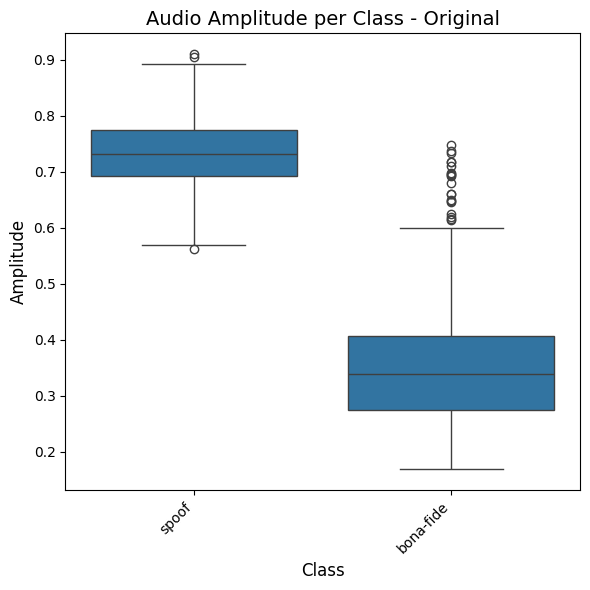

In [6]:
analyze_amplitudes(speaker_df, "Original")

##### RMS Normalization

Normalizing dataset...


100%|██████████| 2000/2000 [00:08<00:00, 222.53it/s]


Done!
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/people-metadata.csv
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/files-metadata.csv
Dataset normalized. New dataset saved to  /home/lozavival/Documents/AUDIOS/datasets/normalized
Calculating amplitudes...


100%|██████████| 2000/2000 [00:00<00:00, 3168.08it/s]


Amplitudes calculation done.
Amplitude mean of each class - 0.01 RMS Normalization:
label
bona-fide    0.069299
spoof        0.052966
Name: amplitude, dtype: float32


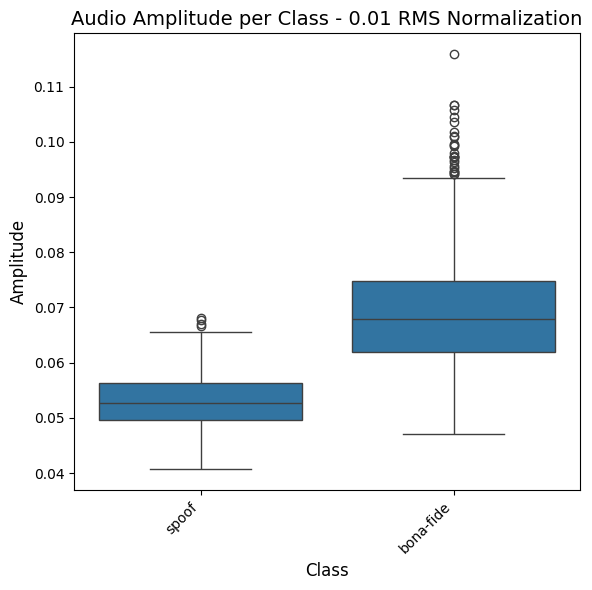

In [7]:
normalize_dataset(
    SPEAKER_RELEASE_META_PATH,
    NORMALIZED_DATASET_PATH,
    target_rms=0.01
)
speaker_rms_df = calculate_amplitudes(SPEAKER_NORMALIZED_META_PATH)
analyze_amplitudes(speaker_rms_df, "0.01 RMS Normalization")

Normalizing dataset...


100%|██████████| 2000/2000 [00:08<00:00, 235.60it/s]


Done!
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/people-metadata.csv
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/files-metadata.csv
Dataset normalized. New dataset saved to  /home/lozavival/Documents/AUDIOS/datasets/normalized
Calculating amplitudes...


100%|██████████| 2000/2000 [00:00<00:00, 3212.92it/s]


Amplitudes calculation done.
Amplitude mean of each class - 0.1 RMS Normalization:
label
bona-fide    0.692467
spoof        0.529706
Name: amplitude, dtype: float32


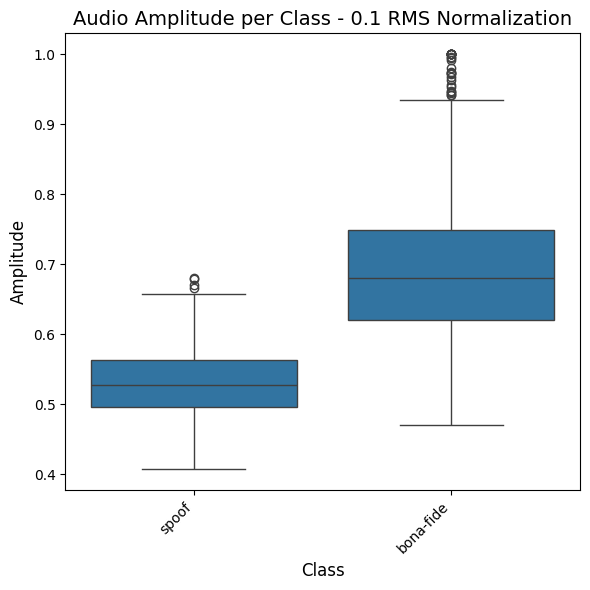

In [8]:
normalize_dataset(
    SPEAKER_RELEASE_META_PATH,
    NORMALIZED_DATASET_PATH,
    target_rms=0.1
)
speaker_rms_df = calculate_amplitudes(SPEAKER_NORMALIZED_META_PATH)
analyze_amplitudes(speaker_rms_df, "0.1 RMS Normalization")

Normalizing dataset...


100%|██████████| 2000/2000 [00:08<00:00, 229.77it/s]


Done!
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/people-metadata.csv
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/files-metadata.csv
Dataset normalized. New dataset saved to  /home/lozavival/Documents/AUDIOS/datasets/normalized
Calculating amplitudes...


100%|██████████| 2000/2000 [00:00<00:00, 3198.55it/s]


Amplitudes calculation done.
Amplitude mean of each class - 0.2 RMS Normalization:
label
bona-fide    0.999833
spoof        0.985980
Name: amplitude, dtype: float32


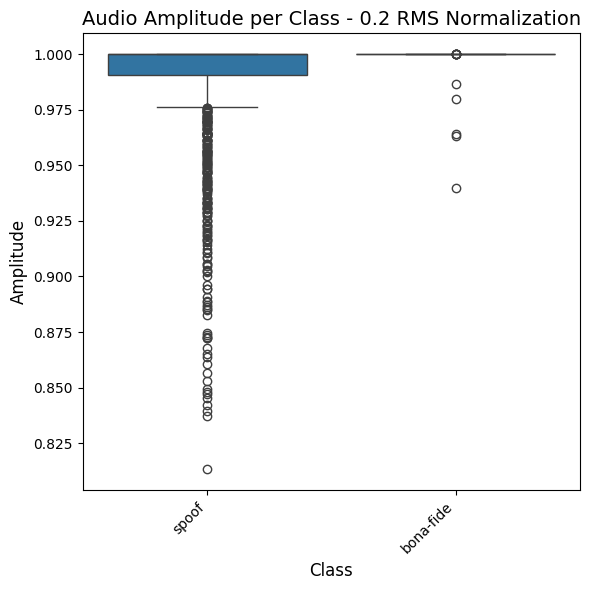

In [9]:
normalize_dataset(
    SPEAKER_RELEASE_META_PATH,
    NORMALIZED_DATASET_PATH,
    target_rms=0.2
)
speaker_rms_df = calculate_amplitudes(SPEAKER_NORMALIZED_META_PATH)
analyze_amplitudes(speaker_rms_df, "0.2 RMS Normalization")

Normalizing dataset...


100%|██████████| 2000/2000 [00:07<00:00, 266.25it/s]


Done!
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/people-metadata.csv
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/files-metadata.csv
Dataset normalized. New dataset saved to  /home/lozavival/Documents/AUDIOS/datasets/normalized
Calculating amplitudes...


100%|██████████| 2000/2000 [00:00<00:00, 3254.69it/s]

Amplitudes calculation done.
Amplitude mean of each class - 0.5 RMS Normalization:
label
bona-fide    1.0
spoof        1.0
Name: amplitude, dtype: float32


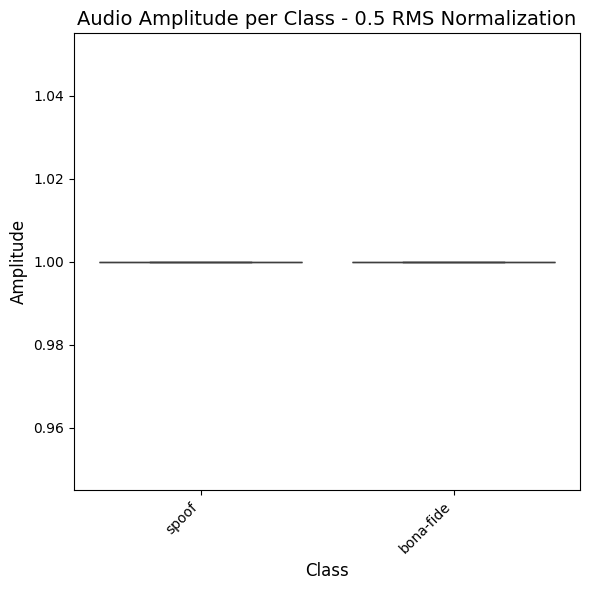

In [10]:
normalize_dataset(
    SPEAKER_RELEASE_META_PATH,
    NORMALIZED_DATASET_PATH,
    target_rms=0.5
)
speaker_rms_df = calculate_amplitudes(SPEAKER_NORMALIZED_META_PATH)
analyze_amplitudes(speaker_rms_df, "0.5 RMS Normalization")

##### Peak Normalization

Normalizing dataset...


100%|██████████| 2000/2000 [00:08<00:00, 247.12it/s]


Done!
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/people-metadata.csv
Metadata CSV written to /home/lozavival/Documents/AUDIOS/datasets/normalized/files-metadata.csv
Dataset normalized. New dataset saved to  /home/lozavival/Documents/AUDIOS/datasets/normalized
Calculating amplitudes...


100%|██████████| 2000/2000 [00:00<00:00, 3205.48it/s]


Amplitudes calculation done.
Amplitude mean of each class - Peak Normalization:
label
bona-fide    0.99999
spoof        0.99998
Name: amplitude, dtype: float32


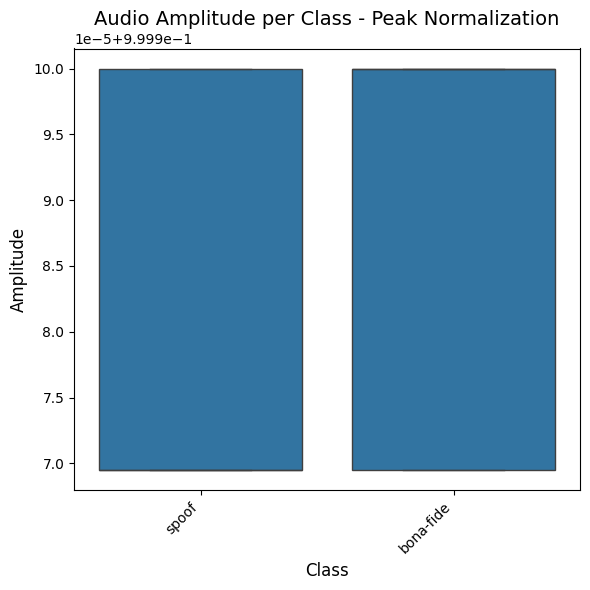

In [11]:
normalize_dataset(
    SPEAKER_RELEASE_META_PATH,
    NORMALIZED_DATASET_PATH
)
speaker_peak_df = calculate_amplitudes(SPEAKER_NORMALIZED_META_PATH)
analyze_amplitudes(speaker_peak_df, "Peak Normalization")

[Back to top](#topo)